In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ncp_df = pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')

In [3]:
ncp_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15.0,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  


In [4]:
#a. Find the 10 most common (known) recorded causes of death.

ncp_df_vc = ncp_df['Cause of Death/Burial'].value_counts()
#above shows only top and bottom few, so doing .head
ncp_df_vc.head(10)

Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: Cause of Death/Burial, dtype: int64

b. Clean up some of the misspellings. Use the replace method to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".

In [5]:
#based changes below on ncp_df_vc.head(40). have to re-do it after changes 

ncp_df = ncp_df.replace('Cholrea', 'Cholera')
ncp_df = ncp_df.replace('Colera*', 'Cholera', regex=True)
ncp_df = ncp_df.replace(['Still Born', 'Stil Born'], ['Stillborn', 'Stillborn'])
ncp_df = ncp_df.replace(['Not Known', 'Measels', 'Complicated', 'Teethin'], ['Unknown', 'Measles', 'Complication', 'Teething'])

In [6]:
ncp_df_vc2 = ncp_df['Cause of Death/Burial'].value_counts()
ncp_df_vc2.head(20)

Unknown           1899
Consumption       1767
Cholera           1242
Stillborn         1204
Complication       748
Old Age            604
Teething           552
Pneumonia          516
Flux               469
Measles            460
Cold               421
Typhoid Fever      310
Brain Fever        286
Dropsy             284
Whooping Cough     205
Small Pox          196
Scarlot Fever      192
Infl of Bowels     156
Dropsey            151
Feever             140
Name: Cause of Death/Burial, dtype: int64

   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

Text(0.5, 1.0, 'Top 10 Causes for Burial at Nash City Cem')

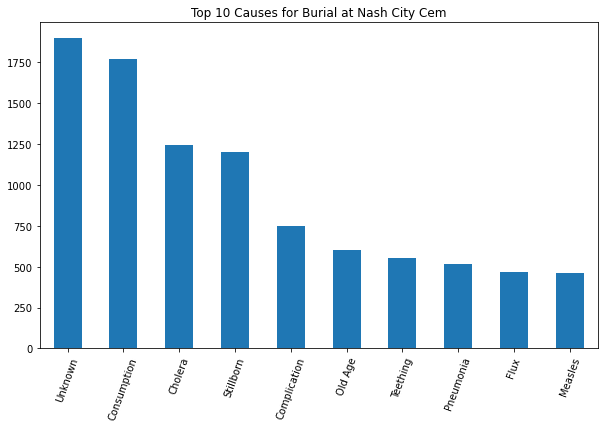

In [7]:
#creating a static, sorted top 10
ncp_df_vc2 = ncp_df_vc2.sort_values(ascending=False)
ncp_df_vc2 = ncp_df_vc2[0:10]
#did I need to do that? how would I limit to 10 on the graph if not?

plt.figure(figsize=(10, 6))
ncp_df_vc2.plot(kind='bar')
plt.xticks(rotation = 70)
plt.title('Top 10 Causes for Burial at Nash City Cem')

In [8]:
#search for a string. I was curious. Note that the wildcard ignores the F, returns *ver
# ncp_df[ncp_df['Cause of Death/Burial'].astype('string').str.contains('F*ver')]

3. Create a line chart showing the number of burials per year.

In [9]:
#ncp_df['Burial Year'].value_counts()
#convert date that's a float to int
#ncp_df['Burial Year'] = ncp_df['Burial Year'].astype('int'). didn't work
#ncp_df = ncp_df.astype({'Burial Year':'int'}) same error. bc of blanks?
ncp_df['Burial Year'] = ncp_df['Burial Year'].fillna(0).astype('int')
ncp_df.info()
ncp_df = ncp_df[ncp_df['Burial Year'] >0]
#worked! Need to ignore 0s?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19745 non-null  int32  
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(3), int32(1), object(10)
memory usage: 2.0+

ncp_df['Burial Year'].value_counts() gives counts/year with the Burial Year as the index, and sorted by the Values (not chronologically). This gives wonky graphs. 

To overcome, use sort_index to sort the Burial_Year column (remember it's this subset's index)

<AxesSubplot:>

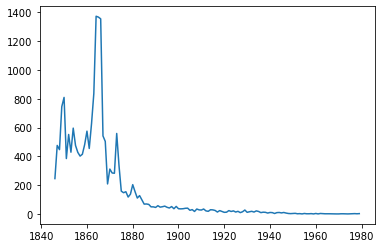

In [10]:
ncp_df['Burial Year'].value_counts().sort_index().plot(kind='line')
#sort index needed here to 

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?


In [11]:
#categorial sort to put months in order by name
#years already corrected by my attempts on Q3

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#df['months'] = pd.Categorical(df['months'], categories=months, ordered=True)
ncp_df['Burial Month'] = pd.Categorical(ncp_df['Burial Month'], categories=months, ordered=True)

In [12]:
year_mon_tab = pd.crosstab(ncp_df['Burial Year'], ncp_df['Burial Month'])

 c. Filter your table to show only the years 1846 through 1860

another option per Amy: years_1846_1860=cemetery_df.loc[cemetery_df["burial_year"].isin(range(1846,1861))]

In [13]:
year_mon_tab.loc[1846:1860]

Burial Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Burial Year,,,,,,,,,,,,
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
1850,24,26,43,29,37,120,370,52,22,27,28,31
1851,26,31,27,29,26,37,49,35,32,42,14,37
1852,37,32,39,37,58,84,76,54,31,32,36,36
1853,35,39,35,31,36,54,47,32,34,27,28,31
1854,35,33,34,43,61,137,95,44,34,25,25,30


 **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

<AxesSubplot:xlabel='Burial Month', ylabel='Burial Year'>

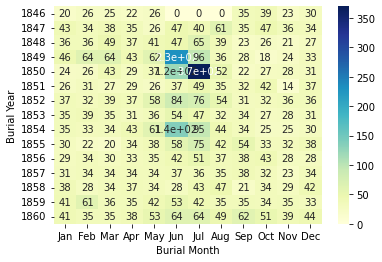

In [14]:
sns.heatmap(year_mon_tab.loc[1846:1860], cmap="YlGnBu", annot=True)

5. **Burials per Decade**     
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.

for Q5 per Selamawit: 
    df.query('Sex == "M" or Sex == "F"')
    decade_sex.crosstab(df.decade,df.sex,normalize='index)*100')

   5a. Create a "Decade" column to show the decade in which a burial occurred. 

In [32]:
ncp_df['Decade'] = ncp_df['Burial Year']-(ncp_df['Burial Year']%10)
ncp_df['Decade'] = ncp_df['Decade'].astype('int')
#ncp_df['Decade'] = (ncp_df['Burial Year']/10)*10 never
ncp_df

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Decade
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,1970
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",1970
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,1970
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978,F,W,91.0,Nashville,NaN,sect.ion 9,15.0,Magnolia,1970
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19738,4-1846,Emmily,Sep,9.0,25.0,1846,F,B,16.0,City,Feever,Poplar,200.0,slave to J. Chappell,1840
19739,4-1846,infant,Sep,9.0,26.0,1846,M,W,NaN,City,Diarherea,Central,lot,son of Mr. E. Maguire Box grave,1840
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery,1840
19741,4-1846,infant,Sep,9.0,28.0,1846,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman,1840


  5b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials. 

In [33]:
ncp_sex_df = ncp_df.query('Sex == "M" or Sex == "F"')

In [40]:
decade_sex = pd.crosstab(ncp_sex_df['Decade'], ncp_sex_df['Sex'], normalize='index')*100
decade_sex

Sex,F,M
Decade,,
1840,45.664740,54.335260
1850,46.049661,53.950339
1860,47.956962,52.043038
1870,50.369762,49.630238
1880,52.053388,47.946612
1890,51.578947,48.421053
1900,51.543210,48.456790
1910,54.430380,45.569620
1920,54.285714,45.714286


c. Create a clustered bar chart to show how male and female burials have changed over time.

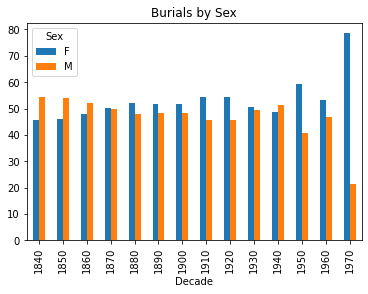

In [48]:
decade_sex.plot(kind='bar')
plt.title('Burials by Sex');